In [ ]:
!pip install -U langchain langchain-core langchain-groq faiss-cpu sentence-transformers tqdm > /dev/null


In [ ]:
# ==============================================================
# 🧩 Cell 1: Setup & Groq API Test
# This cell installs dependencies, loads API key, and tests connection.
# ==============================================================

# --- Install latest libraries (stable & compatible) ---
!pip install -U langchain langchain-core langchain-groq faiss-cpu sentence-transformers matplotlib seaborn scikit-learn tqdm > /dev/null

# --- Imports ---
import os
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
from google.colab import userdata

# --- Load Groq API Key from Colab Secrets ---
groq_api_key = userdata.get('GROQ_API_KEY')


if not groq_api_key:
    raise ValueError("❌ GROQ_API_KEY not found. Please add it in Colab -> Secrets -> 'GROQ_API_KEY'.")
else:
    os.environ["GROQ_API_KEY"] = groq_api_key


# --- Test the Groq connection ---
try:
    # Initialize the Groq LLM (we'll use 'mixtral-8x7b' for best reasoning quality)
    llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0.2)

    # Send a simple test prompt
    response = llm.invoke([HumanMessage(content="Test connection: reply with 'Groq API is working perfectly ✅'")])
    print("✅ Groq API Test Response:")
    print(response.content)

except Exception as e:
    print("❌ Error testing Groq API connection:")
    print(e)

✅ Groq API Test Response:
Groq API is working perfectly ✅


### Simulate Streaming network logs

In [ ]:
import pandas as pd
import numpy as np
import random
import warnings
import random
import datetime
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta

#Parameters for simulation
NUM_LOGS = 1000
START_TIME = datetime.now()

 #hELPER FUNCTIONS
def random_ip():
  '''Generate a random IPv4 address'''
  return '.'.join(str(random.randint(0, 255)) for _ in range(4))


def simulate_logs(num_logs=NUM_LOGS, start_time=START_TIME):
  '''Generate synthetic network/server log data.'''
  timestamps = [start_time +timedelta(seconds=i*5) for i in range(num_logs)]
  data = {
      "timestamp": timestamps,
      "source_ip": [random_ip() for _ in range(num_logs)],
      "destination_ip": [random_ip() for _ in range(num_logs)],
      "latency_ms": np.abs(np.random.normal(100, 30, num_logs)),
      "cpu_usage": np.clip(np.random.normal(50,15, num_logs), 0, 100),
      'memory_usage': np.clip(np.random.normal(60,10, num_logs), 0, 100),
      "packet_loss": np.abs(np.random.normal(0.5, 0.3, num_logs)),
      "bytes_sent": np.random.randint(100, 10000, num_logs)

  }

  df = pd.DataFrame(data)
  return df

#Generate the log data
log_df = simulate_logs()

#Display preview
print("Simulated Log Data Sample:")
display(log_df.head())

#Show Summary stats for sanity check....
print("\n Summary stats:")
display(log_df.describe())

Simulated Log Data Sample:


,timestamp,source_ip,destination_ip,latency_ms,cpu_usage,memory_usage,packet_loss,bytes_sent
0,2025-10-30 07:11:38.511848,126.173.233.87,83.70.78.155,121.079289,61.204567,61.193036,0.105800,1690
1,2025-10-30 07:11:43.511848,196.6.130.120,81.80.140.37,88.023392,54.332535,52.064985,0.069423,3414
2,2025-10-30 07:11:48.511848,164.210.115.134,14.65.82.227,115.328993,31.979346,47.134444,0.837574,276
3,2025-10-30 07:11:53.511848,195.186.7.210,194.204.51.194,92.501372,31.244349,71.738926,0.232509,6715
4,2025-10-30 07:11:58.511848,204.129.22.87,214.82.84.141,136.096809,47.877521,66.228500,0.238921,4873



 Summary stats:


,timestamp,latency_ms,cpu_usage,memory_usage,packet_loss,bytes_sent
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2025-10-30 07:53:16.011847936,100.333997,50.148011,59.908201,0.511134,4866.63000
min,2025-10-30 07:11:38.511848,4.881442,4.137597,29.284951,0.000698,102.00000
25%,2025-10-30 07:32:27.261848064,79.853173,39.848502,53.620877,0.308595,2469.75000
50%,2025-10-30 07:53:16.011847936,100.132197,50.229515,59.795189,0.501186,4781.50000
75%,2025-10-30 08:14:04.761847808,120.518766,59.944527,66.867698,0.698692,7203.25000
max,2025-10-30 08:34:53.511848,184.810150,98.071806,90.494485,1.400951,9997.00000
std,NaN,29.649943,15.140399,9.886924,0.272658,2828.28652


### Anamoly Detection Model (Isolation Forest)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

#Select Numeric features for anamoly detection
features = ['latency_ms','cpu_usage','memory_usage','packet_loss','bytes_sent']

#Standardize the features for model training
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_df[features])

#Train the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05,random_state=42, n_estimators=200,max_samples='auto')
log_df['anomaly'] = iso_forest = iso_forest.fit_predict(scaled_data)

#Interpretation
# -1 = anamoly
# 1 = normal

#Count anamolies
num_anomalies = (log_df['anomaly'] == -1).sum()
print(f' Detected {num_anomalies} anomalies out of {len(log_df)} total logs. \n')

 Detected 50 anomalies out of 1000 total logs. 



In [ ]:
#Now lets displya sample anomalies
anomaly_samples = log_df[log_df['anomaly'] == -1].head(10)
print('SAmple Anomalies detected are: ')
display(anomaly_samples)

SAmple Anomalies detected are: 


,timestamp,source_ip,destination_ip,latency_ms,cpu_usage,memory_usage,packet_loss,bytes_sent,anomaly
28,2025-10-30 07:13:58.511848,67.105.189.74,239.67.247.247,31.272328,81.463435,78.527692,0.603160,663,-1
31,2025-10-30 07:14:13.511848,202.75.113.62,6.173.5.85,89.041819,12.730060,67.708284,0.012487,869,-1
35,2025-10-30 07:14:33.511848,64.199.3.59,136.249.176.61,139.770918,78.428388,76.811151,0.199669,8054,-1
67,2025-10-30 07:17:13.511848,230.143.32.255,196.23.15.189,64.181754,11.418917,52.456782,0.871245,211,-1
69,2025-10-30 07:17:23.511848,193.41.87.30,163.22.36.80,70.164775,34.490190,41.268539,1.267924,4170,-1
74,2025-10-30 07:17:48.511848,191.40.218.112,188.86.98.4,91.799179,34.897303,84.144310,0.057550,629,-1
83,2025-10-30 07:18:33.511848,192.26.198.187,224.165.134.151,57.297159,69.303061,38.047105,0.123229,2430,-1
104,2025-10-30 07:20:18.511848,159.119.126.183,100.229.117.47,24.362569,93.737466,72.924904,0.827067,6175,-1
155,2025-10-30 07:24:33.511848,25.222.139.111,186.206.31.119,158.532234,59.284000,77.717012,0.856249,1601,-1
167,2025-10-30 07:25:33.511848,122.107.78.228,114.103.64.139,107.211814,68.190869,88.365079,0.215091,9479,-1


### Visualization of Anomalies

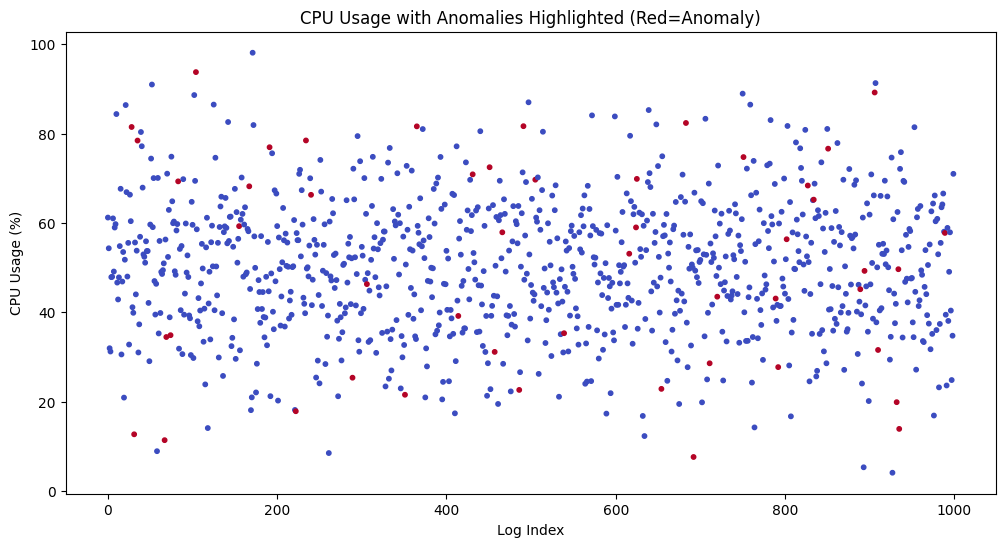

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(range(len(log_df)), log_df['cpu_usage'], c=(log_df['anomaly'] == -1), cmap='coolwarm', s=10)
plt.xlabel('Log Index')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage with Anomalies Highlighted (Red=Anomaly)')
plt.show()


### Building Vector Database for Log Retrieval

In [ ]:
!pip install sentence-transformers faiss-cpu > /dev/null

In [ ]:
from sentence_transformers import SentenceTransformer
import faiss

#NOw creating combined log text for context
log_df['log_text'] = ("Source IP: " + log_df["source_ip"].astype(str) +
                      " | Destination IP: " + log_df['destination_ip'].astype(str) +
                      " | CPU: " + log_df['cpu_usage'].astype(str) +
                      "% | Memory: " + log_df['memory_usage'].astype(str) +
                      "% | Latency: " + log_df['latency_ms'].astype(str) + "ms" +
                      " | Packet Loss: " + log_df['packet_loss'].astype(str) +
                      " | Bytes Sent: " + log_df['bytes_sent'].astype(str))


#NOw lets load the embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

print('Embedding model loaded. Please Generate Embeddings now')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embedding model loaded. Please Generate Embeddings now


### Generating Embeddings

In [ ]:
embeddings = embedding_model.encode(log_df['log_text'].tolist(), show_progress_bar=True)

#Initialize FAISS index
embedding_dim = embeddings.shape[1]
index = faiss.IndexFlatL2(embedding_dim)

#Add embeddings to FAISS index
index.add(np.array(embeddings))

#Store the metadata for retrieval
metadata = log_df[['log_text','anomaly','timestamp','source_ip']].copy()

print(f" Vector Store Created with {index.ntotal} log entries embedded.")
print('Sample embedded log:\n ')
print(metadata.sample(3, random_state=42))


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

 Vector Store Created with 1000 log entries embedded.
Sample embedded log:
 
                                              log_text  anomaly  \
521  Source IP: 171.193.47.242 | Destination IP: 46...        1   
737  Source IP: 133.146.125.20 | Destination IP: 23...        1   
740  Source IP: 158.21.105.96 | Destination IP: 196...        1   

                     timestamp       source_ip  
521 2025-10-30 07:55:03.511848  171.193.47.242  
737 2025-10-30 08:13:03.511848  133.146.125.20  
740 2025-10-30 08:13:18.511848   158.21.105.96  


### Ai Powered Root Cause Summarizer (GROQ Integration)

In [ ]:
!pip install groq > /dev/null

In [ ]:
from groq import Groq

#Initialize the Groq client
groq_client = Groq(api_key= groq_api_key)

#Helper Function to Retrieve similar logs
def retrieve_similar_logs(query_text, top_k=3):
  '''Finds top-k similar logs from FIASS vector store'''
  query_emb = embedding_model.encode([query_text])
  distances , indices = index.search(np.array(query_emb), top_k)
  return metadata.iloc[indices[0]]

#Summary Function
def summarize_anomaly(log_entry):
  '''Fetches context and get Goq LLM summary'''
  similar_logs = retrieve_similar_logs(log_entry, top_k=3)
  context = "\n".join(similar_logs['log_text'].tolist())

  prompt = f'''
  You are an expert AI system monitoring enterprise infrastructure.
  Here is a set of logs related to a potential anomaly:

  {context}

  Summarize what likely caused the issue, and suggest how to fix and prevent it.
  Keep the answer short, professional and actionable
  '''

  response = groq_client.chat.completions.create(
      model = "llama-3.1-8b-instant",
      messages=[{"role": "user", "content":prompt}],
      temperature=0.3,
      max_tokens=200
  )
  return response.choices[0].message.content


#Now try it on a random anomaly
sample_anomaly = metadata[metadata['anomaly'] == -1].sample(1, random_state=42)
sample_log_text = sample_anomaly["log_text"].values[0]
ai_summary = summarize_anomaly(sample_log_text)

print('Sample Log entry: \n', sample_anomaly)
print('\n Ai summary: \n', ai_summary)

Sample Log entry: 
                                               log_text  anomaly  \
240  Source IP: 180.252.88.92 | Destination IP: 12....       -1   

                     timestamp      source_ip  
240 2025-10-30 07:31:38.511848  180.252.88.92  

 Ai summary: 
 **Anomaly Summary:**

The logs indicate a potential network bottleneck or resource exhaustion issue. Three source IP addresses are experiencing high CPU and memory usage, resulting in increased latency and packet loss. This is likely caused by a resource-intensive application or process running on the destination servers (12.193.18.4, 89.22.47.92, and 142.106.252.206).

**Recommendations:**

1. **Investigate Destination Servers:**
	* Check the resource usage and running processes on the destination servers.
	* Identify and optimize or terminate resource-intensive applications.
2. **Monitor Network Traffic:**
	* Analyze network traffic patterns to determine if there are any unusual spikes or bottlenecks.
	* Consider implemen

### Real Time Monitoring & Ai Alert Dashboard

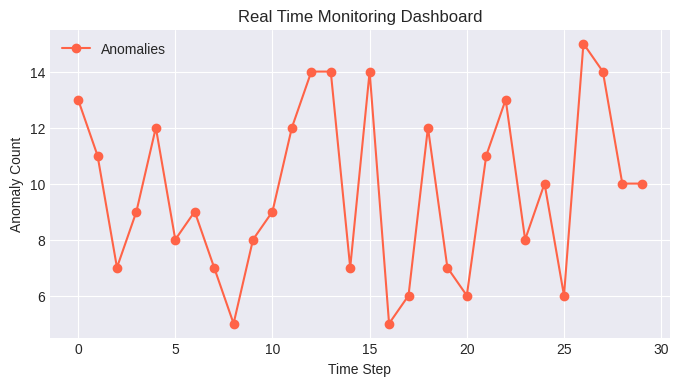

Logs Processed: {total_logs}

 Recent Ai alerts:

 Alert 1:
Log Snippet: Source IP: 170.175.4.80 | Destination IP: 173.114.152.87 | CPU: 35.705756526276865% | Memory: 58.281
Summary: **Anomaly Summary:**

The provided logs indicate a potential network congestion issue, likely caused by a high volume of traffic from multiple sources. The key indicators are:

- High CPU and Memory u...

 Alert 2:
Log Snippet: Source IP: 46.95.187.3 | Destination IP: 137.92.156.2 | CPU: 82.57483964451426% | Memory: 63.3970254
Summary: **Anomaly Summary**

Based on the provided logs, it appears that there is a potential network congestion issue affecting multiple connections. The high CPU and memory usage, combined with elevated lat...

 Alert 3:
Log Snippet: Source IP: 99.144.131.185 | Destination IP: 188.92.36.182 | CPU: 29.603835064364347% | Memory: 48.83
Summary: **Anomaly Summary:**

The logs indicate a potential network congestion issue affecting multiple connections. The common factors among the aff

In [ ]:
import time
import random
from IPython.display import clear_output, display

#Dashboard parameters
window_size = 20
log_buffer = []
anomaly_counts = []
timestamps = []
total_logs = 0
ai_alerts = []

plt.style.use('seaborn-v0_8-darkgrid')

# Simulate live monitoring

for i in range(30):
  new_logs = metadata.sample(random.randint(5, 15))
  total_logs += len(new_logs)

  #Detect Anomalies
  anomalies = new_logs[new_logs['anomaly'] == 1]
  anomaly_count = len(anomalies)
  anomaly_counts.append(anomaly_count)
  timestamps.append(i)

  #Ai summary for 1 random anomaly (if exists)

  if anomaly_count > 0:
    sample_anomaly = anomalies['log_text'].values[0]
    ai_summary = summarize_anomaly(sample_anomaly)
    ai_alerts.append((sample_anomaly[:100], ai_summary[:200]))

  #Lets visualize
  clear_output(wait=True)
  fig,ax = plt.subplots(figsize=(8,4))
  ax.plot(timestamps, anomaly_counts, color='tomato', marker='o',label='Anomalies')
  ax.set_xlabel('Time Step')
  ax.set_ylabel('Anomaly Count')
  ax.set_title('Real Time Monitoring Dashboard')
  ax.legend()
  plt.show()

  #Display recent ai alerts
  print('Logs Processed: {total_logs}')
  if ai_alerts:
    print('\n Recent Ai alerts:')
    for i, (log, summary) in enumerate(ai_alerts[-3:], 1):
      print(f'\n Alert {i}:')
      print(f'Log Snippet: {log}')
      print(f'Summary: {summary}...')
  time.sleep(1.5) #Simulate live delay


### Automated Session Report Generator

In [ ]:
from textwrap import fill
import datetime # Import the datetime module

total_time_steps = len(timestamps)
total_anomalies = sum(anomaly_counts)
avg_anomalies = total_anomalies / total_time_steps
peak_anomalies = max(anomaly_counts)
report_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

#Compose human readable summary
session_summary = f'''
Ai Monitoring Session Report
================================
Session Time:--> {report_time}

Total Time Steps:--> {total_time_steps}
Total Logs Processed:--> {total_logs}
Total Anomalies Detected:--> {total_anomalies}
Average Anomalies per Step: --> {avg_anomalies:.2f}
Peak Anomalies in a Step: --> {peak_anomalies}

Recent Ai Alert Summaries:
==========================================
'''

for i, (log, summary) in enumerate(ai_alerts[-5:], 1):
  session_summary += f'\n {i}. Log: {fill(log, 80)}\n Summary: {fill(summary, 80)}\n'

print(session_summary)


Ai Monitoring Session Report
Session Time:--> 2025-10-30 09:44:09

Total Time Steps:--> 30
Total Logs Processed:--> 307
Total Anomalies Detected:--> 292
Average Anomalies per Step: --> 9.73
Peak Anomalies in a Step: --> 15

Recent Ai Alert Summaries:

 1. Log: Source IP: 179.248.77.96 | Destination IP: 146.175.143.66 | CPU:
43.79933718243853% | Memory: 58.646
 Summary: **Anomaly Summary:**  The provided logs indicate a potential network bottleneck
or congestion issue. The high CPU and memory usage, combined with elevated
latency and packet loss rates, suggest that t

 2. Log: Source IP: 252.244.68.14 | Destination IP: 67.111.233.5 | CPU:
27.148137411559045% | Memory: 54.9936
 Summary: **Anomaly Summary:**  The logs indicate a potential network congestion issue,
likely caused by a Denial of Service (DoS) or Distributed Denial of Service
(DDoS) attack. The high CPU and memory usage,

 3. Log: Source IP: 170.175.4.80 | Destination IP: 173.114.152.87 | CPU:
35.705756526276865% | Memory: 5

### Short Summary by GROQ

In [ ]:
executive_prompt = (
    f'Generate a concise executive summary (under 150 words)'
    f'for this monitoring session report:\n\n'
    f'{session_summary}'
)

executive_summary = summarize_anomaly(executive_prompt)
print('\n Executive Summary (by Groq LLM: \n)')
print(fill(executive_summary, 100))

#save report
with open('ai_monitoring_report.txt', 'w', encoding='utf-8') as f:
  f.write(session_summary)
  f.write('\n\nExecutive Summary:\n\n')
  f.write(executive_summary)
print("\n Full report saved as 'ai_monitoring_report.txt'")



 Executive Summary (by Groq LLM: 
)
**Anomaly Summary**  The provided logs indicate a potential network congestion issue. The high CPU
and memory usage, combined with elevated latency and packet loss, suggest that the destination
servers (136.219.179.19, 33.185.47.45, and 243.223.168.46) are experiencing resource constraints.
**Root Cause**  The likely cause is a sudden surge in traffic or resource-intensive applications
running on these servers, leading to network congestion.  **Recommendations**  1. **Monitor server
resource utilization**: Regularly monitor CPU, memory, and disk usage on the destination servers to
identify potential bottlenecks. 2. **Optimize server configurations**: Review and adjust server
configurations to ensure optimal resource allocation and utilization. 3. **Implement traffic
shaping**: Consider implementing traffic shaping or rate limiting to prevent sudden surges in
traffic. 4. **Upgrade server resources**: If necessary, upgrade server resources (CPU, memor

### Interactive Dashboard Summary (Anomaly Frequency + Trend heatmap)

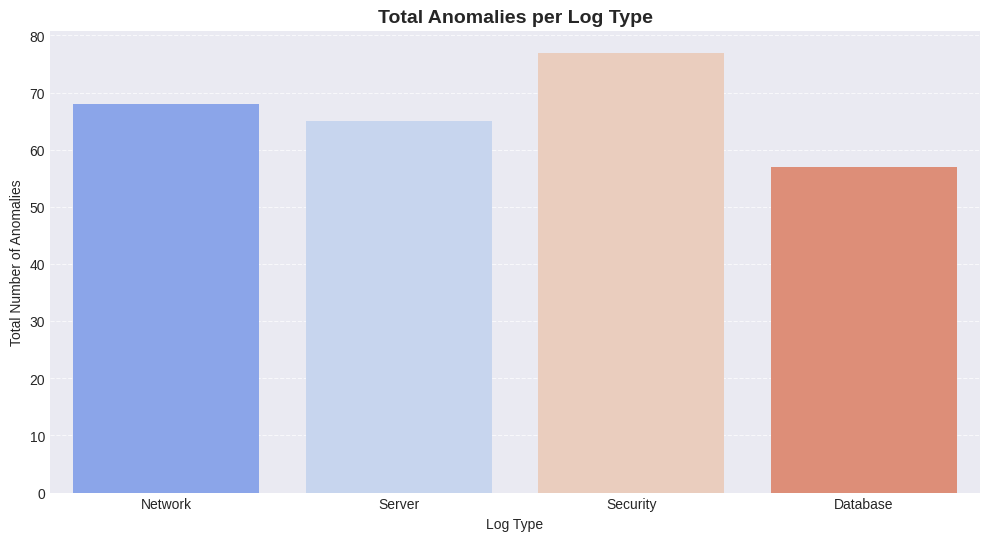

In [ ]:
import seaborn as sns
#preparing the anomaly dataset for visualization
df_anomalies = pd.DataFrame({
    'timestamp': timestamps,
    'total_anomalies': anomaly_counts
})

#Add simulated per log type anomaly contirbutions
np.random.seed(42)
df_anomalies['Network'] = np.random.poisson(lam=df_anomalies['total_anomalies']/4, size=len(df_anomalies))
df_anomalies['Server'] = np.random.poisson(lam=df_anomalies['total_anomalies']/4, size=len(df_anomalies))
df_anomalies['Security'] = np.random.poisson(lam=df_anomalies['total_anomalies']/4, size=len(df_anomalies))
df_anomalies['Database'] = np.random.poisson(lam=df_anomalies['total_anomalies']/4, size=len(df_anomalies))

#Plot 1:--> Bar Chart of total anomalies per log type
plt.figure(figsize=(12, 6))
log_type_totals = {
    'Network': df_anomalies['Network'].sum(),
    'Server': df_anomalies['Server'].sum(),
    'Security': df_anomalies['Security'].sum(),
    'Database': df_anomalies['Database'].sum()
}

sns.barplot(x=list(log_type_totals.keys()), y=list(log_type_totals.values()), palette='coolwarm')
plt.title('Total Anomalies per Log Type', fontsize=14, weight='bold')
plt.xlabel('Log Type')
plt.ylabel('Total Number of Anomalies')
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()

### Heatmap of anomaly trend over time..

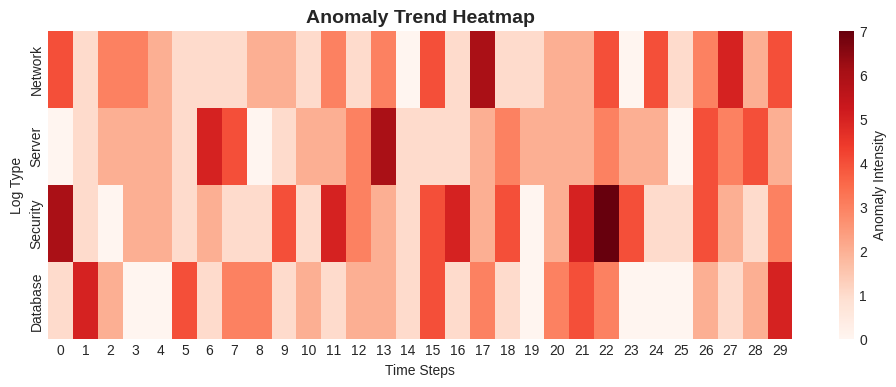

In [ ]:
plt.figure(figsize=(12,4))
heatmap_data = df_anomalies[['Network','Server','Security','Database']].T
sns.heatmap(heatmap_data, cmap='Reds',cbar_kws={'label':'Anomaly Intensity'})
plt.title('Anomaly Trend Heatmap', fontsize=14, weight='bold')
plt.xlabel('Time Steps')
plt.ylabel('Log Type')
plt.show()